## IrisDataset con K-means

In [1]:
#Importando librerias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [2]:
#Cargando dataset

path_file = 'C:\\Users\\dieku\\Documents\\GitHub\\cyberseguridad-code\\Experimentos\\Experimentos_Diego\\Datasets\\iris.csv'

data = pd.read_csv(path_file)

data

,5.1,3.5,1.4,0.2,setosa
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


In [3]:
#Tratamiento del dataset

def set_tipo(x):
    if(x == 'setosa'):
        return 0
    elif(x == 'versicolor'):
        return 1
    else:
        return 2

data['tipo'] = data['setosa'].apply(set_tipo) # Cambiamos el valor de las str por int
#data = data.sort_values('3.5')
data

,5.1,3.5,1.4,0.2,setosa,tipo
0,4.9,3.0,1.4,0.2,setosa,0
1,4.7,3.2,1.3,0.2,setosa,0
2,4.6,3.1,1.5,0.2,setosa,0
3,5.0,3.6,1.4,0.2,setosa,0
4,5.4,3.9,1.7,0.4,setosa,0
...,...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica,2
145,6.3,2.5,5.0,1.9,virginica,2
146,6.5,3.0,5.2,2.0,virginica,2
147,6.2,3.4,5.4,2.3,virginica,2


In [10]:
dataX = data.drop(['setosa'],axis=1).copy()
dataY = data[['tipo']].copy()

In [11]:
dataX

,5.1,3.5,1.4,0.2,tipo
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [12]:
dataY

,tipo
0,0
1,0
2,0
3,0
4,0
...,...
144,2
145,2
146,2
147,2


In [13]:
dataX.describe()

,5.1,3.5,1.4,0.2,tipo
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369,1.006711
std,0.828594,0.433499,1.759651,0.761292,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
print(dataY.groupby('tipo').size())

tipo
0    49
1    50
2    50
dtype: int64


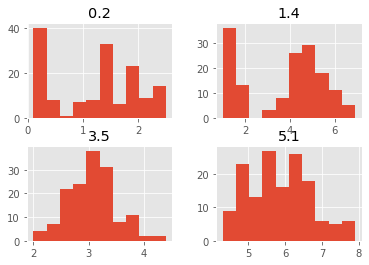

In [16]:
# Visualizacion de la informacion 

dataX.drop(['tipo'],1).hist()
plt.show()

C:\Users\dieku\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


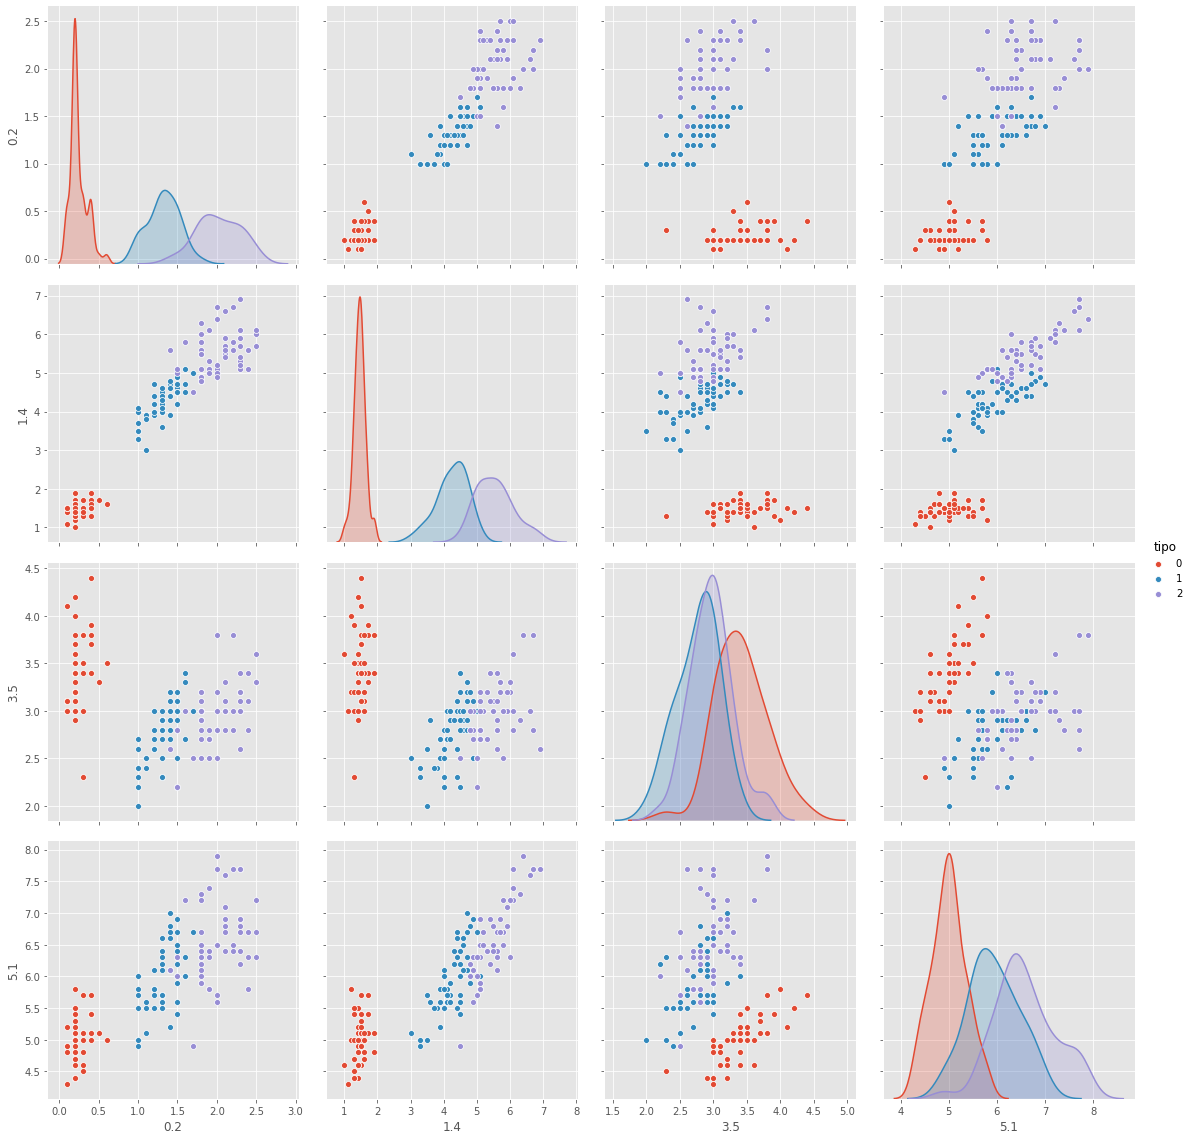

In [18]:
sb.pairplot(dataX.dropna(), hue='tipo',size=4, vars=['0.2','1.4','3.5','5.1'], kind='scatter')

In [19]:
#Seleccion de datos.

X = np.array(dataX[['0.2','1.4','3.5','5.1']]) 
y = np.array(dataX['tipo'])
X.shape

(149, 4)

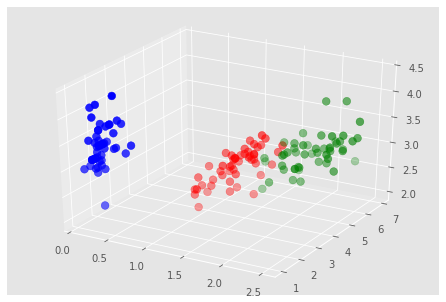

In [20]:
#Grafica 3d respecto a las  3 categorias
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)

## Obtener valor de K - Procedimiento K-Means

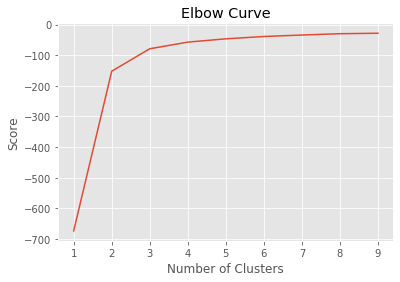

In [23]:
Nc = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# Consideracion del numero de clusters.

### Sabemos que son 3 diferentes grupos, probaremos con 2 y 3 clusters.
### Ademas la curva se suaviza en k = 3



# Ejecutar Kmeans

In [24]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[1.43387097 4.39354839 2.7483871  5.9016129 ]
 [0.24489796 1.46530612 3.41632653 5.00408163]
 [2.07105263 5.74210526 3.07368421 6.85      ]]


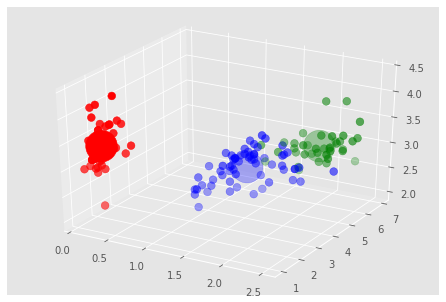

In [26]:
#Prediccion de clusters.

labels = kmeans.predict(X)
#Obteniendo los centros de los clusters.  ¿ centroides ?
C = kmeans.cluster_centers_
colores = ['blue','red','green']
asignar = []
for row in labels:
    asignar.append(colores[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2], c=asignar, s=60)
ax.scatter(C[:,0],C[:,1],C[:,2], c=colores, s=1000)


# Crearemos 4 graficas para ver relaciones entre los datos

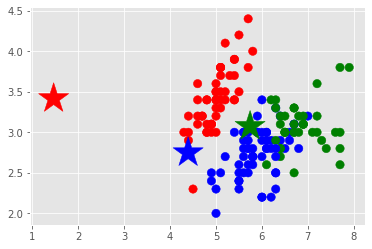

In [28]:
f1 = dataX['5.1'].values
f2 = dataX['3.5'].values
f3 = dataX['1.4'].values
f4 = dataX['0.2'].values

plt.scatter(f1,f2, c = asignar, s= 70)
plt.scatter(C[:,1],C[:,2], marker='*',c=colores,s=1000)
plt.show()

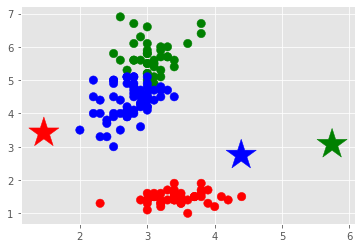

In [29]:
plt.scatter(f2,f3, c = asignar, s= 70)
plt.scatter(C[:,1],C[:,2], marker='*',c=colores,s=1000)
plt.show()

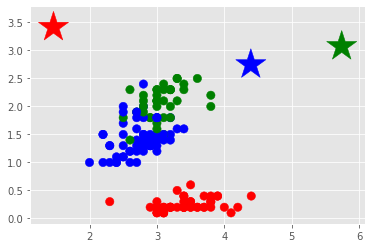

In [30]:
plt.scatter(f2,f4, c = asignar, s= 70)
plt.scatter(C[:,1],C[:,2], marker='*',c=colores,s=1000)
plt.show()

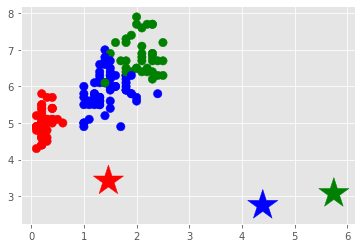

In [31]:
plt.scatter(f4,f1, c = asignar, s= 70)
plt.scatter(C[:,1],C[:,2], marker='*',c=colores,s=1000)
plt.show()

In [32]:
X_new = np.array([[2.0, 3.8, 4.9, 2.0]])

new_labels = kmeans.predict(X_new)
print(new_labels)

[1]
